In this notebook, I am going to demonstrate basic linear and logistic regression on two different datasets. Logistic regression will be used to predict species of a penguin based on its anatomical feautures and linear regression will be used to predict a total bill of incoming customers with given feautures like day of week, the number of customers for that bill etc.

# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,classification_report,accuracy_score, confusion_matrix
%matplotlib inline
plt.style.use('ggplot')

In [2]:
penguins = sns.load_dataset("penguins")
png = penguins.copy()

In [3]:
png.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


It appears our data has missing values in some columns.Where are they?

In [4]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


Missing values for sex column will be imputed by the most frequent value,and for rows 3 and 339, I will impute mean values belonging to species Adelie and Gentoo respectively.

In [5]:
png.sex.mode()

0    Male
dtype: object

In [6]:
png["sex"].fillna(png.sex.mode()[0],inplace=True)

In [7]:
png.sex.isna().sum()

0

In [8]:
png.groupby("species").mean().loc["Adelie"]

bill_length_mm         38.791391
bill_depth_mm          18.346358
flipper_length_mm     189.953642
body_mass_g          3700.662252
Name: Adelie, dtype: float64

In [9]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,Male
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Male


In [10]:
png.iloc[3] = png.iloc[3].fillna(png.groupby("species").mean().loc["Adelie"])

In [11]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,Male


In [12]:
png.iloc[339] = png.iloc[3].fillna(png.groupby("species").mean().loc["Gentoo"])

In [13]:
png[png.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [14]:
png

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.000000,3250.000000,Female
3,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,Male
4,Adelie,Torgersen,36.700000,19.300000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Adelie,Torgersen,38.791391,18.346358,189.953642,3700.662252,Male
340,Gentoo,Biscoe,46.800000,14.300000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.400000,15.700000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.200000,14.800000,212.000000,5200.000000,Female


A straight forward EDA :

<AxesSubplot:>

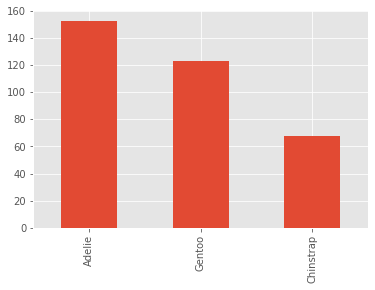

In [15]:
png['species'].value_counts().plot(kind='bar')

<AxesSubplot:>

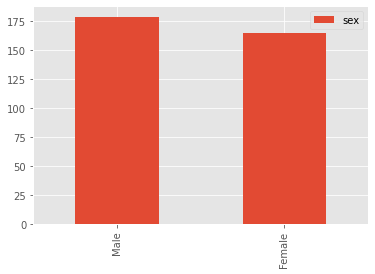

In [16]:
pd.DataFrame(png['sex'].value_counts()).plot(kind='bar')

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


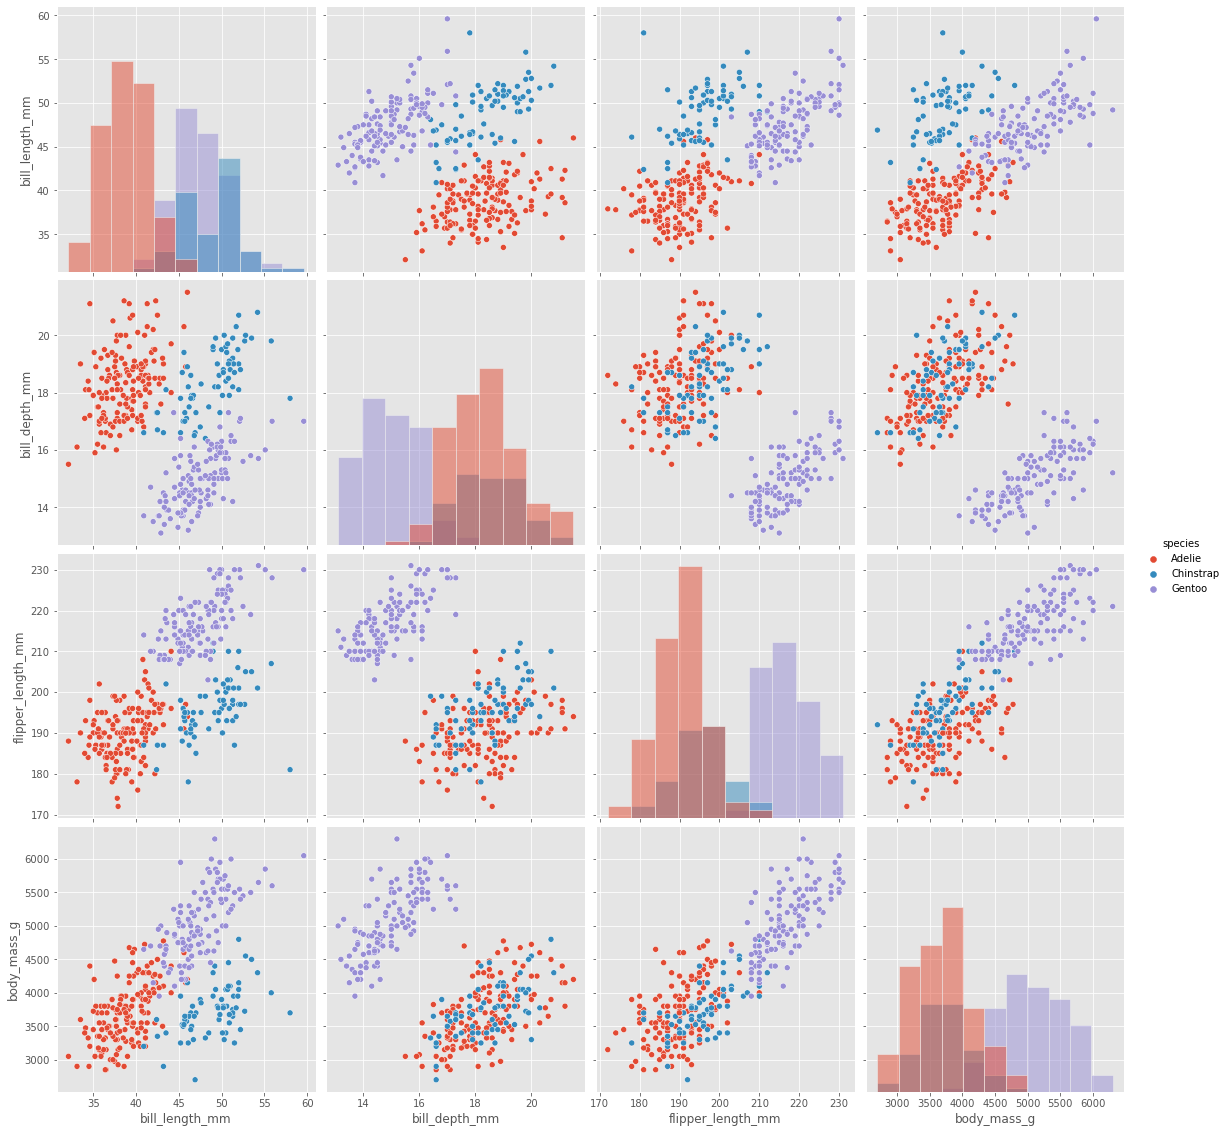

In [17]:
sns.pairplot(png, hue="species", size=4,diag_kind="hist")

In [18]:
png.species.value_counts()

Adelie       153
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

In [21]:
dummy_data = pd.get_dummies(png[["island","sex"]])
png_final = pd.concat([png,dummy_data],axis=1)
png_final.drop(["island","sex"],axis=1,inplace=True)

In [22]:
png_final

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.100000,18.700000,181.000000,3750.000000,0,0,1,0,1
1,Adelie,39.500000,17.400000,186.000000,3800.000000,0,0,1,1,0
2,Adelie,40.300000,18.000000,195.000000,3250.000000,0,0,1,1,0
3,Adelie,38.791391,18.346358,189.953642,3700.662252,0,0,1,0,1
4,Adelie,36.700000,19.300000,193.000000,3450.000000,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
339,Adelie,38.791391,18.346358,189.953642,3700.662252,0,0,1,0,1
340,Gentoo,46.800000,14.300000,215.000000,4850.000000,1,0,0,1,0
341,Gentoo,50.400000,15.700000,222.000000,5750.000000,1,0,0,0,1
342,Gentoo,45.200000,14.800000,212.000000,5200.000000,1,0,0,1,0


In [23]:
X = png_final.drop("species",axis=1)
y = png_final["species"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=1,shuffle=True)

In [24]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
y_pred

array(['Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 

In [27]:
accuracy_score(y_pred,y_test)

0.9903846153846154

In [28]:
confusion_matrix(y_pred,y_test)

array([[46,  0,  0],
       [ 1, 21,  0],
       [ 0,  0, 36]], dtype=int64)

# Linear Regression

In [29]:
tips = sns.load_dataset("tips")
data = tips.copy()
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


A straight forward EDA :

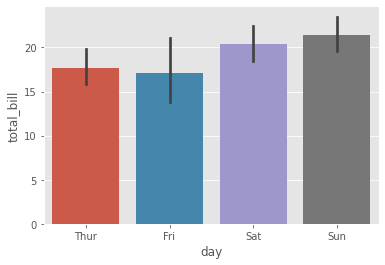

In [31]:
sns.barplot(x="day", y="total_bill", data=tips);

<AxesSubplot:xlabel='time', ylabel='total_bill'>

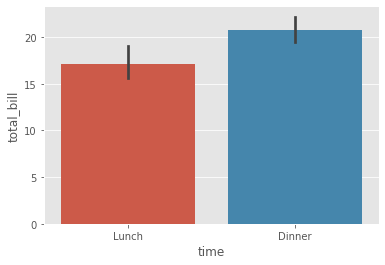

In [32]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

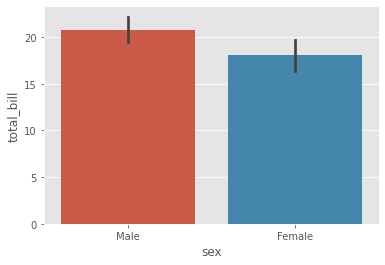

In [33]:
sns.barplot(x="sex", y="total_bill", data=tips)

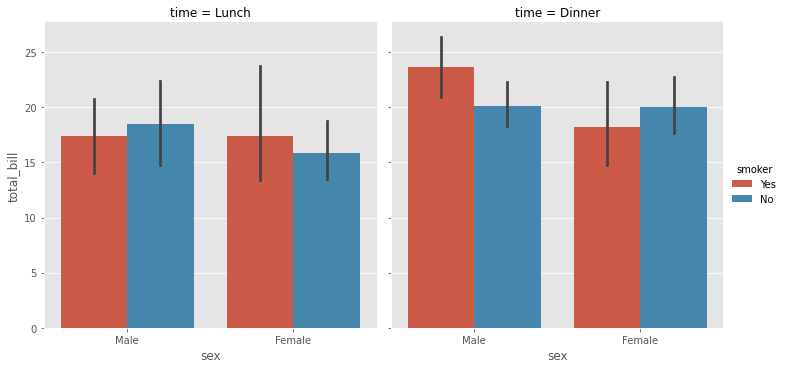

In [34]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="bar");

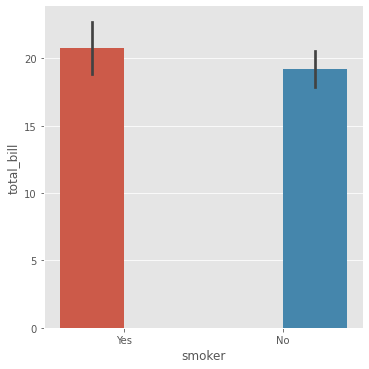

In [35]:
sns.catplot(x="smoker", y="total_bill",
                hue="smoker",
                data=tips, kind="bar");

every variable seems to have a correlation with total bill.Thus we include them in our model.

In [36]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [37]:
dummy_data = pd.get_dummies(data[["sex","smoker","day","time"]])
data_final = pd.concat([data,dummy_data],axis=1)

In [38]:
data_final

,total_bill,tip,sex,smoker,day,time,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0,0,1,0,0,1,0,0,1


<AxesSubplot:>

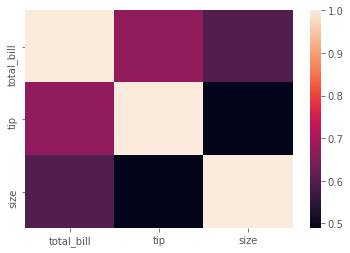

In [39]:
sns.heatmap(data.corr())

In [40]:
data_final.drop(["sex","smoker","day","time"],axis=1,inplace=True)
X = data_final.drop("total_bill",axis=1)
y = data_final["total_bill"]

In [41]:
X = data_final.drop("total_bill",axis=1)
y = data_final["total_bill"]


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state=1,shuffle=True)

In [43]:
linearreg = LinearRegression()
linearreg.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred = linearreg.predict(X_test)

In [46]:
r2_score(y_test,y_pred)

0.5033350544132269